# Credit Risk Prediction Project

## 🎯 Project Goal
The objective of this project is to build a machine learning model that predicts the probability of a person experiencing serious financial delinquency (defaulting on a loan or experiencing distress) within a two-year period. This is a binary classification problem where we will predict one of two outcomes: defaulting (1) or not defaulting (0).

## 🗂️ Dataset Overview
The dataset for this project is from the Kaggle competition, "Give Me Some Credit." It contains historical data on 150,000 borrowers. The features have been anonymized and represent various aspects of a person's financial behavior and history.

| Feature Name | Description |
| :--- | :--- |
| `SeriousDlqin2yrs` | **Target Variable:** A binary indicator of whether the person experienced serious delinquency in the last two years. (1 = Yes, 0 = No). |
| `RevolvingUtilizationOfUnsecuredLines` | The total balance on all unsecured lines of credit (e.g., credit cards) divided by the total credit limits. |
| `age` | The age of the borrower in years. |
| `NumberOfTime30-59DaysPastDueNotWorse` | The number of times the borrower was 30-59 days past due on a payment in the last two years. |
| `DebtRatio` | The ratio of a person's total monthly debt payments to their monthly gross income. |
| `MonthlyIncome` | The borrower's monthly income. |
| `NumberOfOpenCreditLinesAndLoans` | The number of open credit accounts and loans. |
| `NumberOfTimes90DaysLate` | The number of times the borrower was 90 days or more past due on a payment. |
| `NumberRealEstateLoansOrLines` | The number of mortgage and real estate loans. |
| `NumberOfTime60-89DaysPastDueNotWorse` | The number of times the borrower was 60-89 days past due on a payment in the last two years. |
| `NumberOfDependents` | The number of dependents in the household. |

---

## 🚧 Challenges
* **Imbalanced Dataset:** The number of positive cases (`SeriousDlqin2yrs` = 1) is significantly smaller than the number of negative cases (`SeriousDlqin2yrs` = 0). This will require special handling during model training, such as using appropriate evaluation metrics (e.g., F1-score, AUC-ROC) and techniques like oversampling or class weighting.
* **Missing Data:** The `MonthlyIncome` feature has a large number of missing values that will need to be addressed through imputation or other data preprocessing techniques.
* **Outliers:** Some features, particularly `age` and the past-due columns, contain outliers that need to be handled to ensure model robustness.

In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

## Data Cleanning

In [2]:
df = pd.read_csv("GiveMeSomeCredit/cs-training.csv").drop(columns=["Unnamed: 0"])

In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


Key points we can see in describe():
1. RevolvingUtilizationOfUnsecuredLines has outliers (indicator: max = 50708.0)
2. Age has outliers (indicator: min = 0)
3. NumberOfTime30-59DaysPastDueNotWorse has outliers (indicator: max = 98.0)
4. DebtRatio has outliers (indicator: max: 329664.0)

Let's check all the columns individually

#### Target column SeriousDlqin2yrs

In [6]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

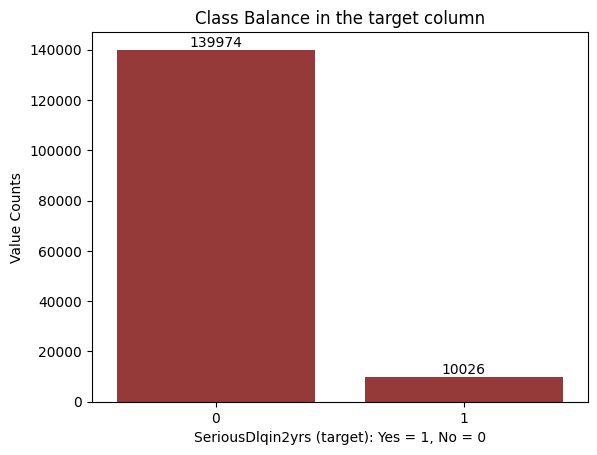

In [7]:
target_valuecount = df['SeriousDlqin2yrs'].value_counts()
ax = sns.barplot(x=target_valuecount.index, y=target_valuecount.values, color="brown")
ax.bar_label(ax.containers[0])
plt.xlabel("SeriousDlqin2yrs (target): Yes = 1, No = 0")
plt.ylabel("Value Counts")
plt.title("Class Balance in the target column");

We can see the class imbalance in our dataset. Let's define the base model accuracy for the model

#### RevolvingUtilizationOfUnsecuredLines

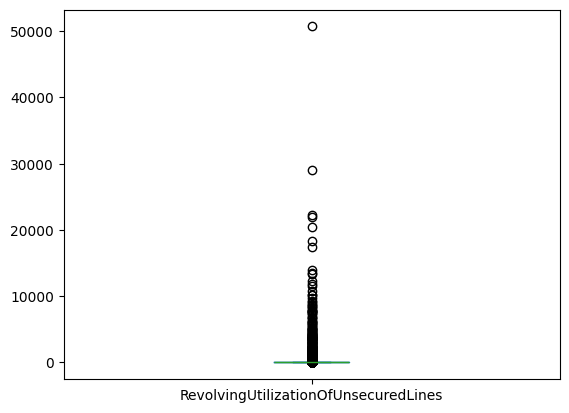

In [8]:
df['RevolvingUtilizationOfUnsecuredLines'].plot(kind='box');

In [9]:
df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)

np.float64(1.0929557681400022)

In [10]:
# wrangle
RevolvingUtilizationOfUnsecuredLines_uppercap = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x: RevolvingUtilizationOfUnsecuredLines_uppercap if x > RevolvingUtilizationOfUnsecuredLines_uppercap else x)

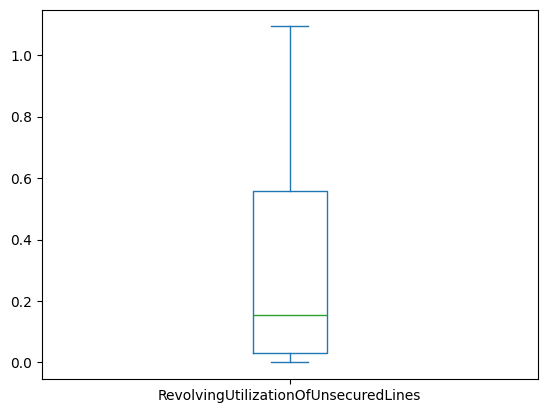

In [11]:
df['RevolvingUtilizationOfUnsecuredLines'].plot(kind='box');

#### age

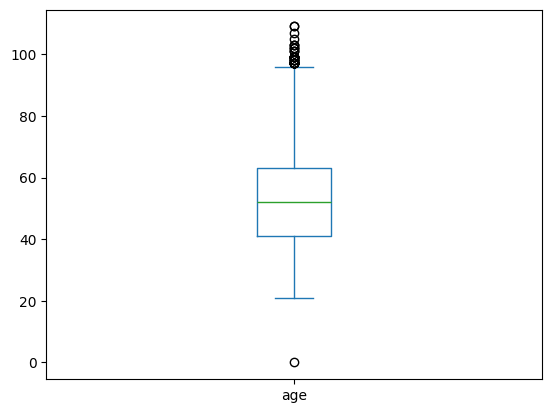

In [12]:
df['age'].plot(kind="box");

In [13]:
df[df['age'] < 20]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [14]:
df['age'].mean()

np.float64(52.295206666666665)

In [15]:
# wrangle
mean_age = df['age'].median()
df['age'] = df['age'].apply(lambda x: mean_age if x < 18 else x)

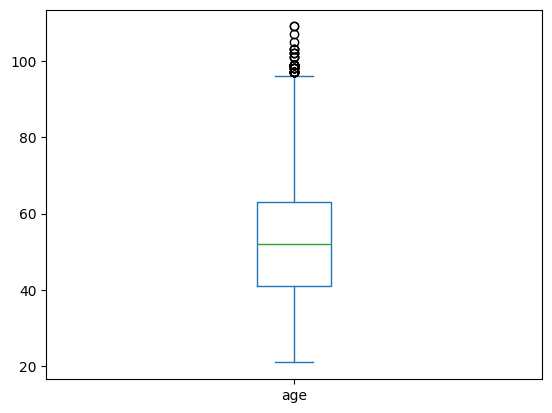

In [16]:
df['age'].plot(kind="box");

#### NumberOfTime30-59DaysPastDueNotWorse

In [17]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [18]:
df[df["SeriousDlqin2yrs"] == 1]['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     5041
1     2409
2     1219
3      618
4      318
5      154
98     143
6       74
7       28
8        8
96       4
9        4
10       3
12       1
13       1
11       1
Name: count, dtype: int64

In [19]:
df['NumberOfTime30-59DaysPastDueNotWorse'].median()

np.float64(0.0)

In [20]:
# wrangle
NumberOfTime30to59DaysPastDueNotWorse_median = df['NumberOfTime30-59DaysPastDueNotWorse'].median()
df["NumberOfTime30-59DaysPastDueNotWorse"] = df['NumberOfTime30-59DaysPastDueNotWorse'].replace([98, 96], NumberOfTime30to59DaysPastDueNotWorse_median)

In [21]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126287
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
12         2
13         1
11         1
Name: count, dtype: int64

#### NumberOfDependents

In [22]:
df['NumberOfDependents'].isna().sum()

np.int64(3924)

In [23]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [24]:
# wrangle
median_number0fdependents =  df['NumberOfDependents'].median()
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(median_number0fdependents)

In [25]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

#### MonthlyIncome

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

We can see there are a large number of missing values in the MonthlyIncome column. If we use simple imputation like with mean or median, it will distort the distribution in some way. We will use advanced imputation technique here.

In [27]:
imputer = IterativeImputer(estimator= RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1), max_iter=10, random_state=42)
if __name__ == "__main__":
    df_imputed_values = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed_values, columns=df.columns)

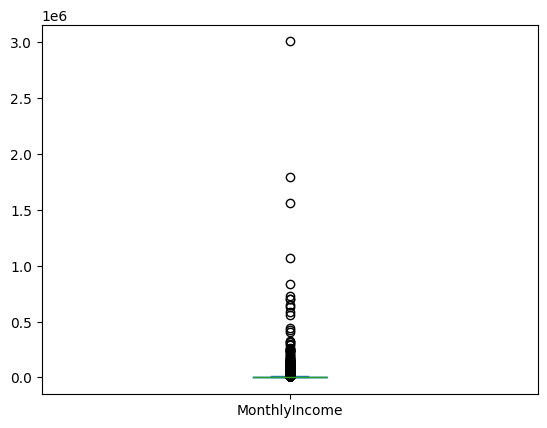

In [28]:
df['MonthlyIncome'].plot(kind = 'box');

In [29]:
df['MonthlyIncome'].quantile(0.99)

np.float64(23200.500000000466)

In [30]:
# wrangle
df['MonthlyIncome'] = df['MonthlyIncome'].clip(lower=0)

In [31]:
# wrangle
monthly_income_upper_cap = df['MonthlyIncome'].quantile(0.99)
df['MonthlyIncome'] = df['MonthlyIncome'].clip(upper=monthly_income_upper_cap)

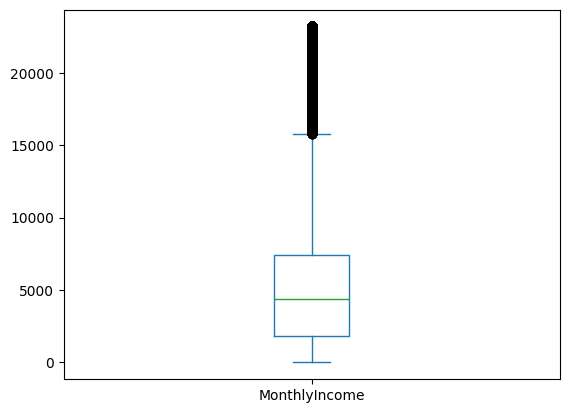

In [32]:
df['MonthlyIncome'].plot(kind="box");

In [33]:
df['MonthlyIncome'].isna().sum()

np.int64(0)

DebtRatio

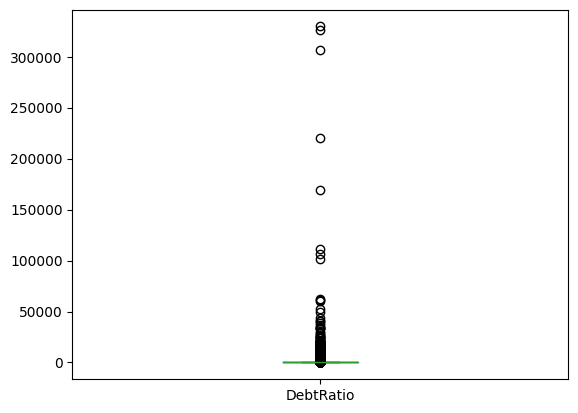

In [34]:
df['DebtRatio'].plot(kind="box");

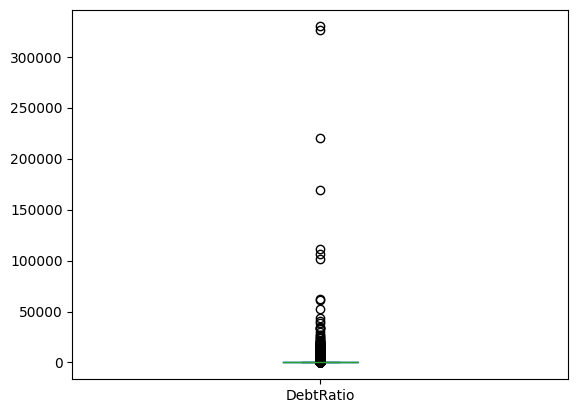

In [35]:
df[df['MonthlyIncome'] != 0]['DebtRatio'].plot(kind="box");

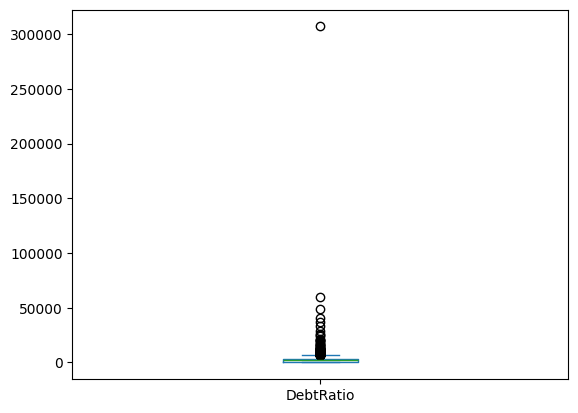

In [36]:
df[df['MonthlyIncome'] == 0]['DebtRatio'].plot(kind="box");

In [37]:
df[df['DebtRatio'] > 1.5].shape

(32073, 11)

In [38]:
df['DebtRatio'].quantile(0.99)

np.float64(4979.040000000037)

In [39]:
# wrangle
upper_cap_debt_ratio = df['DebtRatio'].quantile(0.99)
df['DebtRatio'] = df['DebtRatio'].clip(upper=upper_cap_debt_ratio)

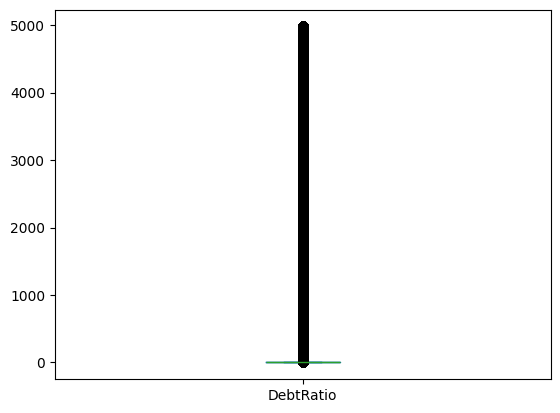

In [40]:
df['DebtRatio'].plot(kind="box");

#### NumberOfOpenCreditLinesAndLoans

In [41]:
df['NumberOfOpenCreditLinesAndLoans'].value_counts()

NumberOfOpenCreditLinesAndLoans
6.0     13614
7.0     13245
5.0     12931
8.0     12562
4.0     11609
9.0     11355
10.0     9624
3.0      9058
11.0     8321
12.0     7005
2.0      6666
13.0     5667
14.0     4546
1.0      4438
15.0     3645
16.0     3000
17.0     2370
0.0      1888
18.0     1874
19.0     1433
20.0     1169
21.0      864
22.0      685
23.0      533
24.0      422
25.0      337
26.0      239
27.0      194
28.0      150
29.0      114
30.0       88
31.0       74
32.0       52
33.0       47
34.0       35
35.0       27
36.0       18
38.0       13
40.0       10
39.0        9
43.0        8
42.0        8
45.0        8
37.0        7
48.0        6
54.0        4
49.0        4
41.0        4
46.0        3
52.0        3
47.0        2
51.0        2
57.0        2
56.0        2
44.0        2
50.0        2
58.0        1
53.0        1
Name: count, dtype: int64

#### NumberOfTimes90DaysLate

In [42]:
df['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0.0     141662
1.0       5243
2.0       1555
3.0        667
4.0        291
98.0       264
5.0        131
6.0         80
7.0         38
8.0         21
9.0         19
10.0         8
96.0         5
11.0         5
13.0         4
15.0         2
14.0         2
12.0         2
17.0         1
Name: count, dtype: int64

In [43]:
# wrangle
NumberOfTimes90DaysLate_median = df['NumberOfTimes90DaysLate'].median()
df["NumberOfTimes90DaysLate"] = df['NumberOfTimes90DaysLate'].replace([98, 96], NumberOfTimes90DaysLate_median)

#### NumberRealEstateLoansOrLines

In [44]:
df['NumberRealEstateLoansOrLines'].value_counts()

NumberRealEstateLoansOrLines
0.0     56188
1.0     52338
2.0     31522
3.0      6300
4.0      2170
5.0       689
6.0       320
7.0       171
8.0        93
9.0        78
10.0       37
11.0       23
12.0       18
13.0       15
14.0        7
15.0        7
17.0        4
16.0        4
25.0        3
23.0        2
20.0        2
19.0        2
18.0        2
26.0        1
21.0        1
54.0        1
29.0        1
32.0        1
Name: count, dtype: int64

In [45]:
df['NumberRealEstateLoansOrLines'] = df['NumberRealEstateLoansOrLines'].clip(upper=17)

#### NumberOfTime60-89DaysPastDueNotWorse

In [46]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0.0     142396
1.0       5731
2.0       1118
3.0        318
98.0       264
4.0        105
5.0         34
6.0         16
7.0          9
96.0         5
8.0          2
11.0         1
9.0          1
Name: count, dtype: int64

In [47]:
# wrangle
NumberOfTime60to89DaysPastDueNotWorse_median = df['NumberOfTime60-89DaysPastDueNotWorse'].median()
df["NumberOfTime60-89DaysPastDueNotWorse"] = df['NumberOfTime60-89DaysPastDueNotWorse'].replace([98, 96], NumberOfTime60to89DaysPastDueNotWorse_median)

In [48]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0.0     142665
1.0       5731
2.0       1118
3.0        318
4.0        105
5.0         34
6.0         16
7.0          9
8.0          2
11.0         1
9.0          1
Name: count, dtype: int64

## EDA

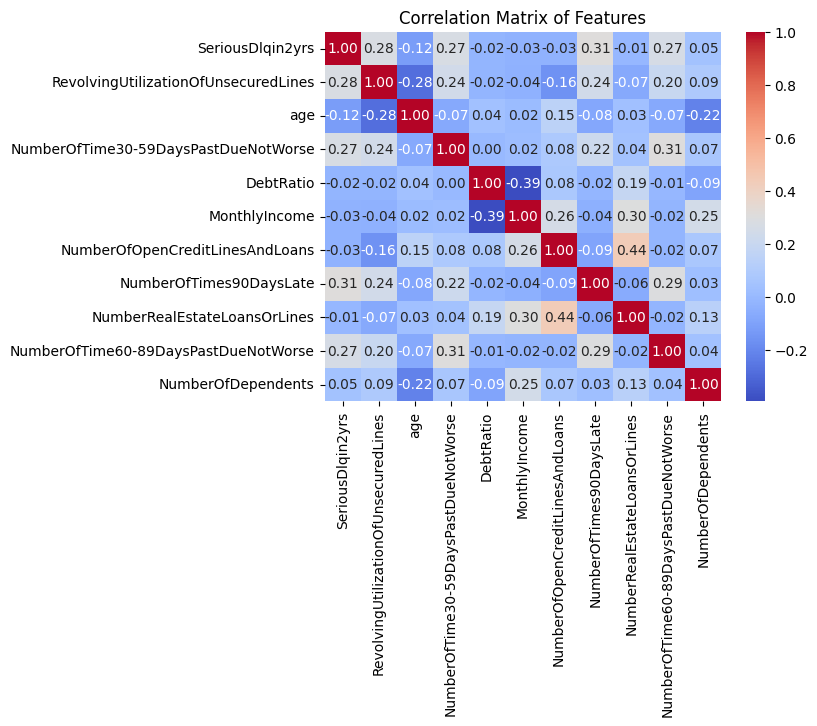

In [49]:
correlation_matrix = df.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features');

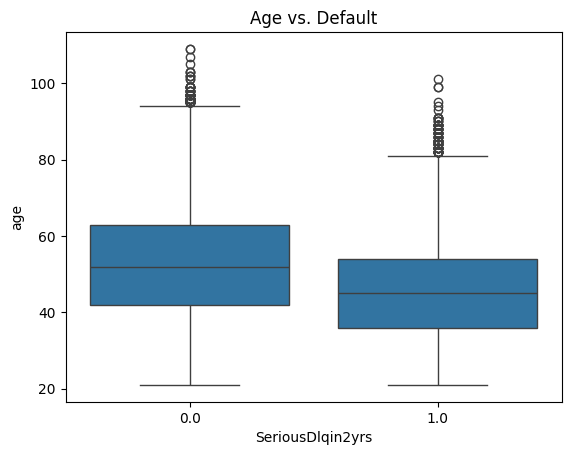

In [50]:
sns.boxplot(x='SeriousDlqin2yrs', y='age', data=df)
plt.title('Age vs. Default');

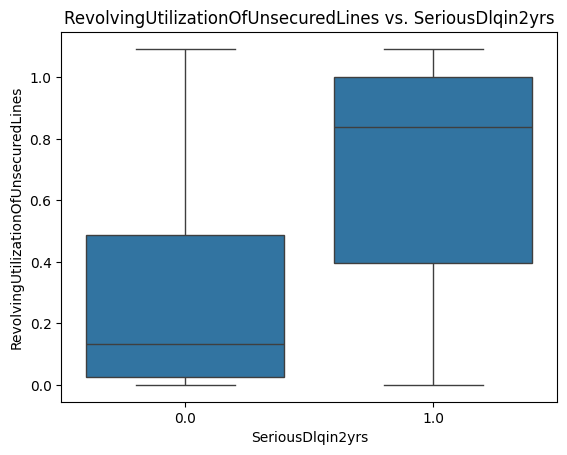

In [51]:
sns.boxplot(x='SeriousDlqin2yrs', y='RevolvingUtilizationOfUnsecuredLines', data=df)
plt.title('RevolvingUtilizationOfUnsecuredLines vs. SeriousDlqin2yrs');

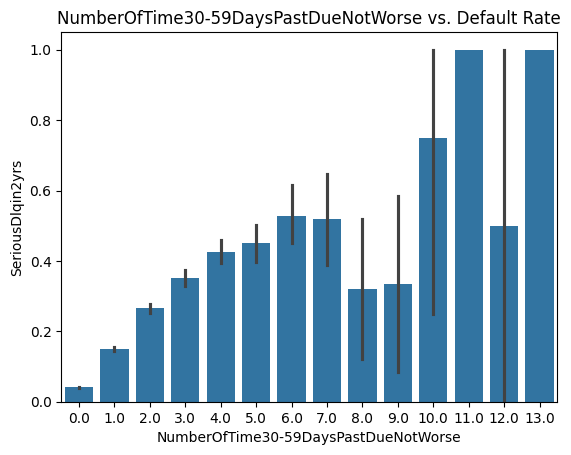

In [52]:
sns.barplot(x='NumberOfTime30-59DaysPastDueNotWorse', y='SeriousDlqin2yrs', data=df)
plt.title('NumberOfTime30-59DaysPastDueNotWorse vs. Default Rate');

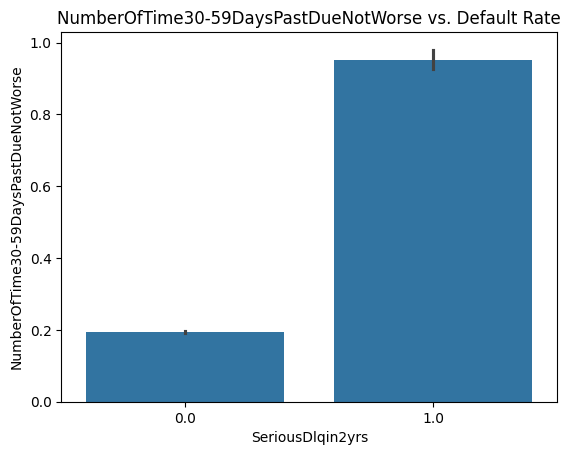

In [53]:
sns.barplot(y='NumberOfTime30-59DaysPastDueNotWorse', x='SeriousDlqin2yrs', data=df)
plt.title('NumberOfTime30-59DaysPastDueNotWorse vs. Default Rate');

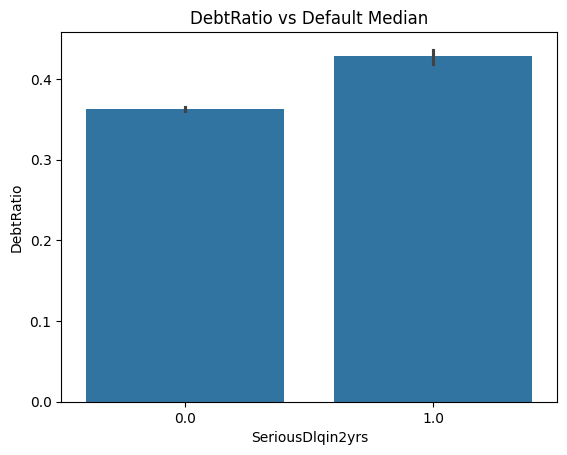

In [54]:
sns.barplot(data= df, x="SeriousDlqin2yrs", y="DebtRatio", estimator="median")
plt.title("DebtRatio vs Default Median");

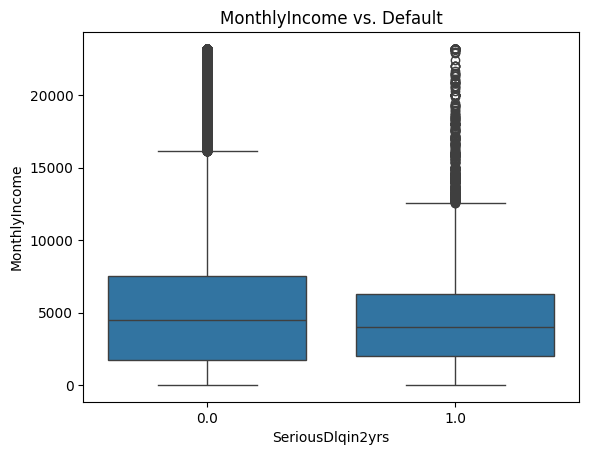

In [55]:
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=df)
plt.title('MonthlyIncome vs. Default');

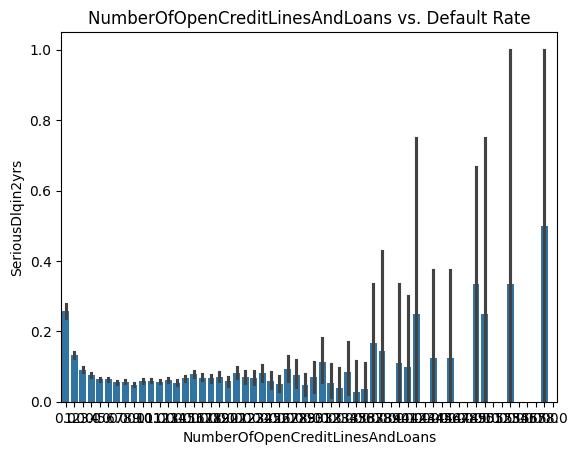

In [56]:
sns.barplot(x='NumberOfOpenCreditLinesAndLoans', y='SeriousDlqin2yrs', data=df)
plt.title('NumberOfOpenCreditLinesAndLoans vs. Default Rate');

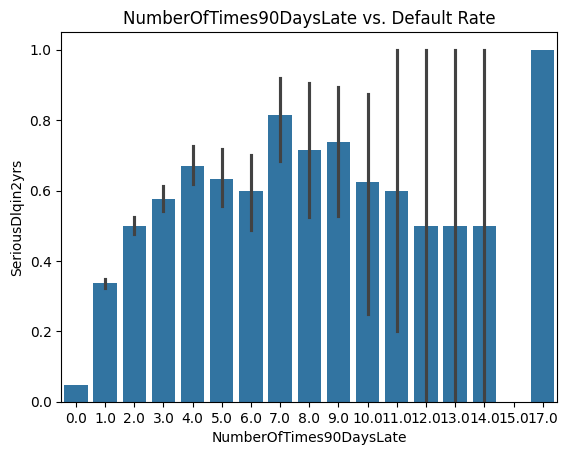

In [57]:
sns.barplot(x='NumberOfTimes90DaysLate', y='SeriousDlqin2yrs', data=df)
plt.title('NumberOfTimes90DaysLate vs. Default Rate');

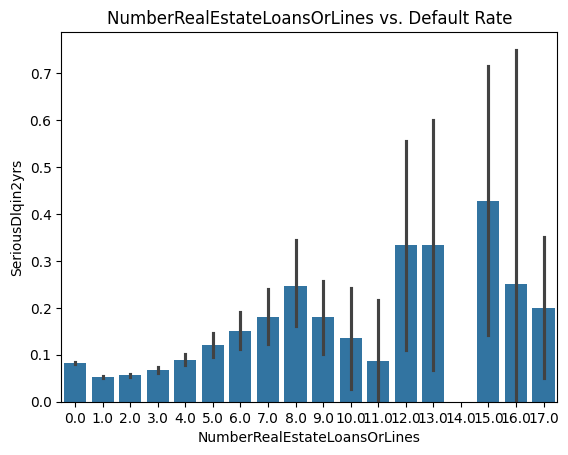

In [58]:
sns.barplot(x='NumberRealEstateLoansOrLines', y='SeriousDlqin2yrs', data=df)
plt.title('NumberRealEstateLoansOrLines vs. Default Rate');

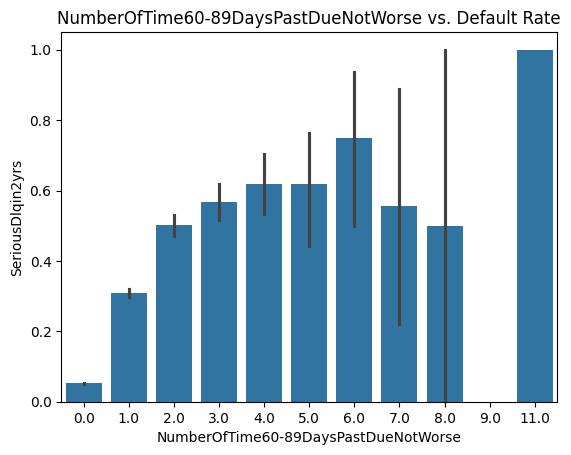

In [59]:
sns.barplot(x='NumberOfTime60-89DaysPastDueNotWorse', y='SeriousDlqin2yrs', data=df)
plt.title('NumberOfTime60-89DaysPastDueNotWorse vs. Default Rate');

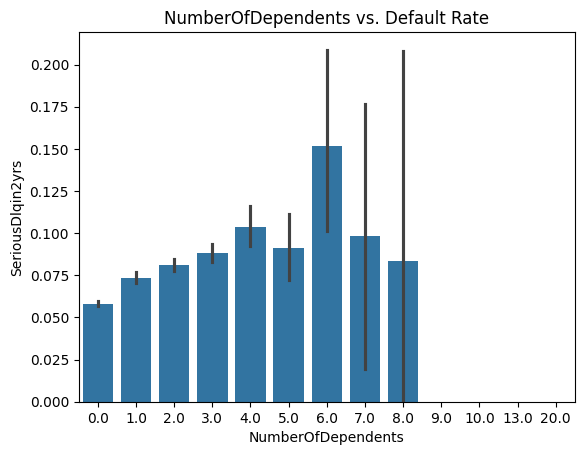

In [60]:
sns.barplot(x='NumberOfDependents', y='SeriousDlqin2yrs', data=df)
plt.title('NumberOfDependents vs. Default Rate');

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  float64
 7   NumberOfTimes90DaysLate               150000 non-null  float64
 8   NumberRealEstateLoansOrLines          150000 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 10  NumberOfDependents                    150000 non-null  float64
dtype

## Model Building and Experimentation

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    balanced_accuracy_score, ConfusionMatrixDisplay
)

In [63]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,1.0,0.024926,23200.5,7.0,0.0,1.0,0.0,0.0


In [64]:
df.rename(columns={"NumberOfTime30-59DaysPastDueNotWorse": "NumberOfTime30_59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse":"NumberOfTime60_89DaysPastDueNotWorse"}, inplace=True)

In [65]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

Cost For Positive Class

In [66]:
y.value_counts()

SeriousDlqin2yrs
0.0    139974
1.0     10026
Name: count, dtype: int64

In [67]:
cost_for_positive_class = round(((y==0).astype(int).sum() / (y==1).astype(int).sum()).item(), 3)
cost_for_positive_class

13.961

Spliting Training and Testing

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

Balanced Bagging using Random Forest

In [69]:
# rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# bbc_rf = BalancedBaggingClassifier(estimator=rfc, random_state=42, n_jobs=-1)

# bbc_rf_param_grid = {
#     "estimator__n_estimators": [100],
#     "estimator__min_samples_split": [6, 10, 14],
#     "estimator__min_samples_leaf": [4, 6, 8, 10],
#     "estimator__max_features": [0.4, 0.6],
#     "n_estimators": [50]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# bbc_rf_gridsearch = GridSearchCV(
#     estimator=bbc_rf,
#     param_grid=bbc_rf_param_grid,
#     scoring="roc_auc",
#     cv=cv,
#     n_jobs=-1,
#     verbose=2
# )

# if __name__ == "__main__":
#     bbc_rf_gridsearch.fit(X_train, y_train)

# best_bbc_rfc = bbc_rf_gridsearch.best_estimator_
# print("Best parameters:", bbc_rf_gridsearch.best_params_)
# print("Best cross-val score:", bbc_rf_gridsearch.best_score_)

# evaluation(best_bbc_rfc, X_train, y_train)

In [70]:
# print("Best parameters:", bbc_rf_gridsearch.best_params_)
# print("Best cross-val score:", bbc_rf_gridsearch.best_score_)

# evaluation(best_bbc_rfc, X_train, y_train, X_test, y_test)

XGBoost Balanced Bagging

In [71]:
# xgbc = XGBClassifier(random_state=42, n_jobs=-1)

# bbc_xgbc = BalancedBaggingClassifier(estimator=xgbc, random_state=42, n_jobs=-1)

# bbc_xgbc_param_grid = {
#     "estimator__n_estimators": [1000, 1500, 2000],
#     "estimator__learning_rate": [0.01, 0.05],
#     "estimator__max_leaves": [8, 12, 16],
#     "n_estimators": [50]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# bbc_xgbc_gridsearch = GridSearchCV(
#     estimator=bbc_xgbc,
#     param_grid=bbc_xgbc_param_grid,
#     scoring="roc_auc",
#     cv=cv,
#     n_jobs=-1,
#     verbose=2
# )

# if __name__ == "__main__":
#     bbc_xgbc_gridsearch.fit(X_train, y_train)

# best_bbc_xgbc = bbc_xgbc_gridsearch.best_estimator_
# print("Best parameters:", bbc_xgbc_gridsearch.best_params_)
# print("Best cross-val score:", bbc_xgbc_gridsearch.best_score_)

In [72]:
# print("Best parameters:", bbc_xgbc_gridsearch.best_params_)
# print("Best cross-val score:", bbc_xgbc_gridsearch.best_score_)

# evaluation(best_bbc_xgbc, X_train, y_train, X_test, y_test)


In [73]:
# lgbmc = LGBMClassifier(random_state=42, n_jobs=-1)

# bbc_lgbmc = BalancedBaggingClassifier(estimator=lgbmc, random_state=42, n_jobs=-1)

# bbc_lgbmc_param_grid = {
#     'estimator__n_estimators': [1500, 2000],
#     'estimator__learning_rate': [0.01, 0.05],
#     'estimator__num_leaves': [8, 12, 16],
#     'estimator__feature_fraction': [0.4, 0.6],
#     'n_estimators': [50]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# bbc_lgbmc_gridsearch = GridSearchCV(
#     estimator=bbc_lgbmc,
#     param_grid=bbc_lgbmc_param_grid,
#     scoring="roc_auc",
#     cv=cv,
#     n_jobs=-1,
#     verbose=2
# )

# if __name__ == "__main__":
#     bbc_lgbmc_gridsearch.fit(X_train, y_train)

# best_bbc_lgbmc = bbc_lgbmc_gridsearch.best_estimator_
# print("Best parameters:", bbc_lgbmc_gridsearch.best_params_)
# print("Best cross-val score:", bbc_lgbmc_gridsearch.best_score_)
# evaluation(best_bbc_lgbmc, X_train, y_train, X_test, y_test)

In [74]:
# # save the models
# import joblib
# joblib.dump(best_bbc_lgbmc, "best_bbc_lgbmc.pkl")
# joblib.dump(best_bbc_xgbc, "best_bbc_xgbc.pkl")
# joblib.dump(best_bbc_rfc, "best_bbc_rfc.pkl")

In [75]:
import joblib
best_bbc_rfc = joblib.load("best_bbc_rfc.pkl")
best_bbc_xgbc = joblib.load("best_bbc_xgbc.pkl")
best_bbc_lgbmc = joblib.load("best_bbc_lgbmc.pkl")

Cost Sensitive Random Forest and Compare with Balanced Bagging counterpart

In [76]:
# rfc = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

# rfc_param_grid = {
#     "n_estimators": [100],
#     "max_depth": [5, 7],
#     "min_samples_split": [6],
#     "min_samples_leaf": [1, 2, 4]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# rfc_gridsearch = GridSearchCV(
#     estimator=rfc,
#     param_grid=rfc_param_grid,
#     scoring="roc_auc",
#     cv=cv,
#     n_jobs=-1,
#     verbose=2
# )

# if __name__ == "__main__":
#     rfc_gridsearch.fit(X_train, y_train)

# best_rfc = rfc_gridsearch.best_estimator_
# print("Best parameters:", rfc_gridsearch.best_params_)
# print("Best cross-val score:", rfc_gridsearch.best_score_)

# evaluation(best_rfc, X_train, y_train, X_test, y_test)

In [77]:
# joblib.dump(best_rfc, "best_rfc.pkl")

Cost Sensitive LightGBM and Compare with Balanced Bagging counterpart

In [78]:
# lgbmc = LGBMClassifier(random_state=42, n_jobs=-1, scale_pos_weight = cost_for_positive_class)

# lgbmc_param_grid = {
#     "num_leaves": [8, 16, 24],
#     #"max_depth": [3, 5, 7],
#     "min_child_samples": [16, 24],
#     "subsample": [0.6, 0.8, 1.0],
#     "colsample_bytree": [0.6, 0.8, 1.0]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# lgbmc_gridsearch = GridSearchCV(
#     estimator=lgbmc,
#     param_grid=lgbmc_param_grid,
#     scoring="roc_auc",
#     cv=cv,
#     n_jobs=-1,
#     verbose=2
# )

# if __name__ == "__main__":
#     lgbmc_gridsearch.fit(X_train, y_train)

# best_lgbmc = lgbmc_gridsearch.best_estimator_
# print("Best parameters:", lgbmc_gridsearch.best_params_)
# print("Best cross-val score:", lgbmc_gridsearch.best_score_)

# evaluation(best_lgbmc, X_train, y_train, X_test, y_test)

In [79]:
# joblib.dump(best_lgbmc, "best_lgbmc.pkl")

Cost Sensitive XGBoost and Compare with Balanced Bagging counterpart

In [80]:
# xgbc = XGBClassifier(random_state=42, n_jobs=-1, scale_pos_weight = cost_for_positive_class)

# xgbc_param_grid = {
#     "n_estimators": [500, 1000],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "max_depth": [3, 5, 7],
#     "min_child_weight": [1, 5, 10],
#     "subsample": [0.6, 0.8, 1.0],
#     "colsample_bytree": [0.6, 0.8, 1.0]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# xgbc_gridsearch = GridSearchCV(
#     estimator=xgbc,
#     param_grid=xgbc_param_grid,
#     scoring="roc_auc",
#     cv=cv,
#     n_jobs=-1,
#     verbose=2
# )

# if __name__ == "__main__":
#     xgbc_gridsearch.fit(X_train, y_train)

# best_xgbc = xgbc_gridsearch.best_estimator_
# print("Best parameters:", xgbc_gridsearch.best_params_)
# print("Best cross-val score:", xgbc_gridsearch.best_score_)

# evaluation(best_xgbc, X_train, y_train, X_test, y_test)

In [81]:
# joblib.dump(best_xgbc, "best_xgbc.pkl")

Lets do stacking

In [82]:
best_rfc = joblib.load("best_rfc.pkl")
best_xgbc = joblib.load("best_xgbc.pkl")
best_lgbmc = joblib.load("best_lgbmc.pkl")

In [83]:
estimators = [
    ("rfc", best_rfc),
    ("xgb", best_xgbc),
    ("lgbm", best_lgbmc)
]

final_estimator = LogisticRegression(solver='liblinear', max_iter=2000, class_weight={0:1, 1:cost_for_positive_class})

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=cv,
    passthrough=False,
    n_jobs=-1
)

if __name__ == "__main__":
    stacking_model.fit(X_train, y_train)

In [84]:
joblib.dump(stacking_model, "stacking_model.joblib")

['stacking_model.joblib']


------ Training Evaluation at threshold=0.5 ------
Accuracy:  0.7924
Balanced Accuracy: 0.8009
Precision: 0.2175
Recall:    0.8106
F1-Score:  0.3430
AUC-ROC:   0.8836

Classification Report (Train):
              precision    recall  f1-score   support

         0.0     0.9831    0.7911    0.8767    125977
         1.0     0.2175    0.8106    0.3430      9023

    accuracy                         0.7924    135000
   macro avg     0.6003    0.8009    0.6098    135000
weighted avg     0.9320    0.7924    0.8411    135000

Confusion Matrix (Train):
 [[99662 26315]
 [ 1709  7314]]


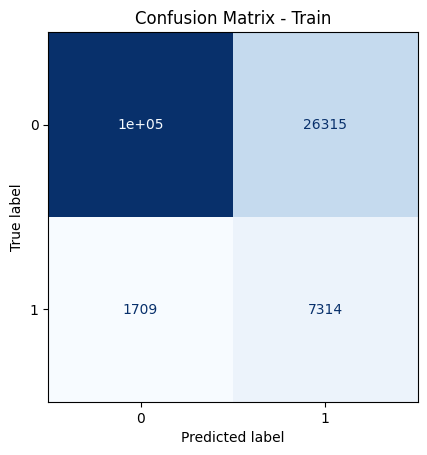


------ Testing Evaluation at threshold=0.5 ------
Accuracy:  0.7907
Balanced Accuracy: 0.7948
Precision: 0.2144
Recall:    0.7996
F1-Score:  0.3382
AUC-ROC:   0.8739


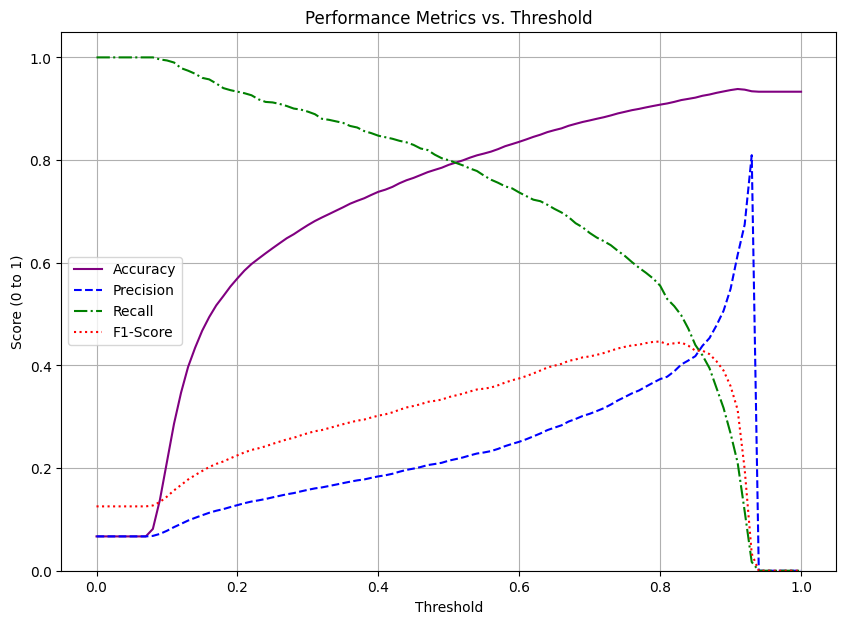


Classification Report (Test):
              precision    recall  f1-score   support

         0.0     0.9821    0.7901    0.8757     13997
         1.0     0.2144    0.7996    0.3382      1003

    accuracy                         0.7907     15000
   macro avg     0.5983    0.7948    0.6070     15000
weighted avg     0.9308    0.7907    0.8398     15000

Confusion Matrix (Test):
 [[11059  2938]
 [  201   802]]


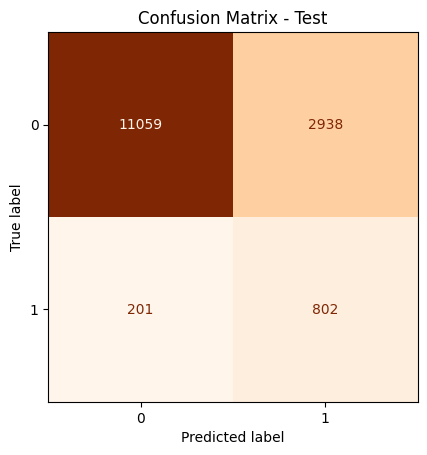

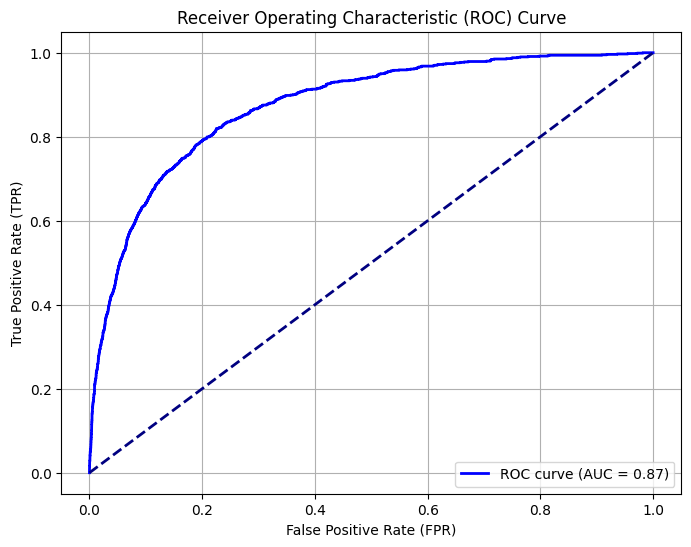

In [85]:
import joblib
best_model = joblib.load("stacking_model.joblib")

from model_evaluation_pipeline import classification_evaluation
classification_evaluation(best_model, X_train, y_train, X_test, y_test)

In [90]:
df['NumberOfTime30_59DaysPastDueNotWorse'].value_counts()

NumberOfTime30_59DaysPastDueNotWorse
0.0     126287
1.0      16033
2.0       4598
3.0       1754
4.0        747
5.0        342
6.0        140
7.0         54
8.0         25
9.0         12
10.0         4
12.0         2
13.0         1
11.0         1
Name: count, dtype: int64

In [91]:
df['NumberOfTime60_89DaysPastDueNotWorse'].value_counts()

NumberOfTime60_89DaysPastDueNotWorse
0.0     142665
1.0       5731
2.0       1118
3.0        318
4.0        105
5.0         34
6.0         16
7.0          9
8.0          2
11.0         1
9.0          1
Name: count, dtype: int64

In [92]:
df['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0.0     141931
1.0       5243
2.0       1555
3.0        667
4.0        291
5.0        131
6.0         80
7.0         38
8.0         21
9.0         19
10.0         8
11.0         5
13.0         4
15.0         2
14.0         2
12.0         2
17.0         1
Name: count, dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30_59DaysPastDueNotWorse  150000 non-null  float64
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  float64
 7   NumberOfTimes90DaysLate               150000 non-null  float64
 8   NumberRealEstateLoansOrLines          150000 non-null  float64
 9   NumberOfTime60_89DaysPastDueNotWorse  150000 non-null  float64
 10  NumberOfDependents                    150000 non-null  float64
dtype

For competition

In [85]:
from data_preprocessing_pipeline import wrangle
from model_training_pipeline import training

df = pd.read_csv("GiveMeSomeCredit/cs-training.csv").drop(columns=["Unnamed: 0"])
df_test = pd.read_csv("GiveMeSomeCredit/cs-test.csv")

X_test = df_test.drop("Unnamed: 0", axis=1)

df, X_test = wrangle(df, X_test)

X_test.drop("SeriousDlqin2yrs", axis=1, inplace=True)

prediction_probs = best_model.predict_proba(X_test)[:, 1]

submission_df = pd.DataFrame({
    'Id': df_test['Unnamed: 0'],
    'SeriousDlqin2yrs': prediction_probs
})

submission_df.to_csv('submission.csv', index=False)

Inputs are pandas DataFrames


c:\Users\prati\Desktop\Credit_Risk_Prediction\crpenv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [89]:
submission_df.rename(columns={'SeriousDlqin2yrs':'Probability'}, inplace=True)
submission_df.to_csv('submission.csv', index=False)

In [88]:
submission_df.columns

Index(['Id', 'SeriousDlqin2yrs'], dtype='object')